<a href="https://colab.research.google.com/github/iamimpeccable/Churn-Prediction/blob/main/691churnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import tensorflow.keras.backend as K
cfg = tf.compat.v1.ConfigProto()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
hr_data = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling.csv')

In [ ]:
hr_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
hr_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
hr_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
print("Number of duplicates : ", len(hr_data[hr_data.duplicated()]))

Number of duplicates :  0


In [ ]:
hr_data = hr_data.drop_duplicates()
print("Number of duplicates : ", len(hr_data[hr_data.duplicated()]))

Number of duplicates :  0


In [ ]:
# Arranging columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
hr_data = hr_data[['Exited'] + continuous_vars + cat_vars]
hr_data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1,1,Spain,Female


In [ ]:
#For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
hr_data.loc[hr_data.HasCrCard == 0, 'HasCrCard'] = -1
hr_data.loc[hr_data.IsActiveMember == 0, 'IsActiveMember'] = -1
hr_data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1,1,Spain,Female


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (hr_data[i].dtype == np.str or hr_data[i].dtype == np.object):
        for j in hr_data[i].unique():
            hr_data[i+'_'+j] = np.where(hr_data[i] == j,1,-1)
        remove.append(i)
hr_data = hr_data.drop(remove, axis=1)
hr_data.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1,1,-1,1,-1,1,-1


In [ ]:
X = hr_data.drop(columns = ['Exited'])
y = hr_data['Exited']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

In [ ]:
mlp = MLPClassifier(max_iter = 500)
mlp.fit(X_train, y_train)
history = mlp.loss_curve_

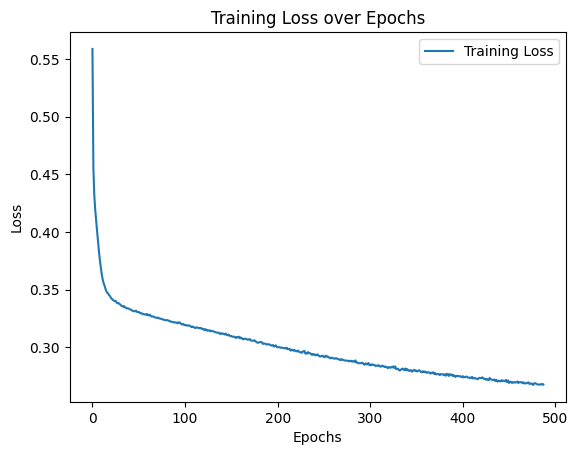

In [ ]:
plt.plot(history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
test_accuracy = mlp.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.86


In [ ]:
mlp = tf.keras.models.Sequential()

mlp.add(tf.keras.layers.Dense(units=6,activation='relu'))
mlp.add(tf.keras.layers.Dense(units=6,activation='relu'))
mlp.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hst = ann.fit(X_train,y_train,batch_size=32,epochs=10)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7602
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7958
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.8027
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8117
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8179
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8278
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8351
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8416
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.8470
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3679 - accuracy: 0.8495

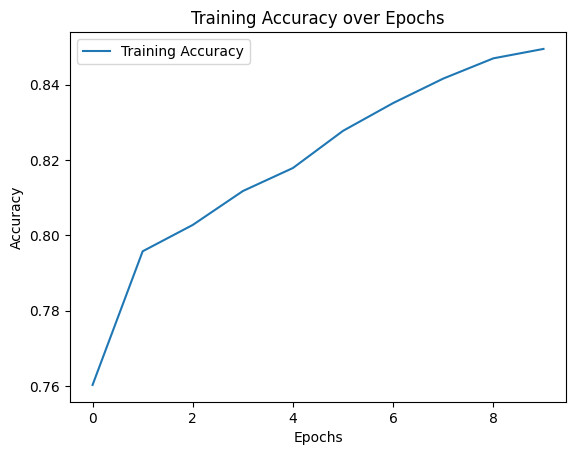

In [ ]:
# Plot training accuracy
plt.plot(hst.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

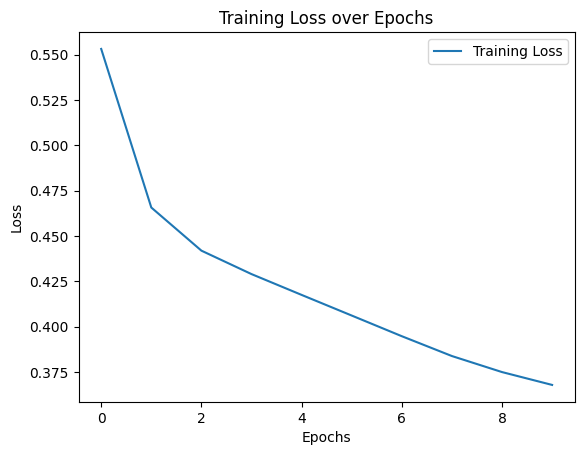

In [ ]:
# Plot training loss
plt.plot(hst.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
ann_y_pred = ann.predict(X_test)
ann_y_pred = (ann_y_pred>0.5)

print('The accuracy score of MLP is : ', accuracy_score(y_test, ann_y_pred))
print('The precision score of MLP is : ', precision_score(y_test, ann_y_pred))

63/63 [==============================] - 0s 2ms/step
The accuracy score of MLP is :  0.855
The precision score of MLP is :  0.688
